<a href="https://colab.research.google.com/github/catuscio/Kaggle-Exercise/blob/main/DACON_%EC%98%81%ED%99%94%EC%8B%A4%EC%8A%B5_%EA%B3%B5%EB%B6%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 영화 관객 수 데이터를 활용한 데이터 분석

감독, 이름, 상영등급, 스태프 수 등의 정보로 영화 관객 수를 예측하는 모델을 만들어 주세요!

## 1. Library & Data

In [4]:
import pandas as pd
import lightgbm as lgb

In [6]:
# load data set
train = pd.read_csv('/content/sample_data/영화실습/movies_train.csv')      # trainset
test = pd.read_csv('/content/sample_data/영화실습/movies_test.csv')        # testset
submission = pd.read_csv('/content/sample_data/영화실습/submission.csv')   # DACON submission set

## 2. Exploratory Data Analysis (EDA)
> 탐색적 데이터 분석


### pd.DataFrame.head()
 - 데이터 프레임의 위에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [ ]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [ ]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [ ]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


### pd.DataFrame.tail()
 - 데이터 프레임의 아래에서 부터 n개 행을 보여주는 함수
 - n의 기본 값(default 값)은 5

In [ ]:
train.tail()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525
599,베를린,CJ 엔터테인먼트,액션,2013-01-30,120,15세 관람가,류승완,NaN,0,363,5,7166532


### pd.DataFrame.shape
 - 데이터 프레임의 행의 개수와 열의 개수가 저장되어 있는 속성(attribute)

In [8]:
# 데이터셋의 행/열 개수 확인을 위해 shape 속성(attribute)을 출력한다다
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


### pd.DataFrame.info()
- 데이터셋의 column별 정보를 알려주는 함수
- 비어 있지 않은 값은 (non-null)은 몇개인지?
- column의 type은 무엇인지?
 - type의 종류 : int(정수), float(실수), object(문자열), 등등 (date, ...)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


> 7번 컬럼은 값이 270개로 부족하므로, 전처리 과정에서 보완해야 한다.

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


### pd.DataFrame.describe()
> for more information:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


> e+0n == 10의 n제곱을 의미함.\
> e.g) e+02 == 100

## about options: https://pandas.pydata.org/pandas-docs/stable/user_guide/options.*html*
### .options.display
- 값 표시 방식 접근\
참고: \
https://stackoverflow.com/questions/20937538/how-to-display-pandas-dataframe-of-floats-using-a-format-string-for-columns

In [9]:
# 표시되는 정보들이 소수점 아래 한 자리까지만 표시되도록 함
pd.options.display.float_format = '{:.1f}'.format

### pd.DataFrame.groupby()
 - 집단에 대한 통계량 확인 
 
 > 이 경우, 장르 별 관객수 확인

In [10]:
train[['genre', 'box_off_num']].groupby('genre').mean().sort_values('box_off_num')

,box_off_num
genre,
뮤지컬,6627.0
다큐멘터리,67172.3
서스펜스,82611.0
애니메이션,181926.7
멜로/로맨스,425968.0
미스터리,527548.2
공포,590832.5
드라마,625689.8
코미디,1193914.0


### pd.DataFrame.corr()

- correlation coefficient 의 줄임말 입니다 

In [ ]:
pd.reset_option('display.float_format')

In [ ]:
train.corr()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
time,1.000000,0.264675,0.306727,0.623205,0.114153,0.441452
dir_prev_bfnum,0.264675,1.000000,0.131822,0.323521,0.083818,0.283184
dir_prev_num,0.306727,0.131822,1.000000,0.450706,0.014006,0.259674
num_staff,0.623205,0.323521,0.450706,1.000000,0.077871,0.544265
num_actor,0.114153,0.083818,0.014006,0.077871,1.000000,0.111179
box_off_num,0.441452,0.283184,0.259674,0.544265,0.111179,1.000000


In [11]:
# seaborn 라이브러리
import seaborn as sns

<Axes: >

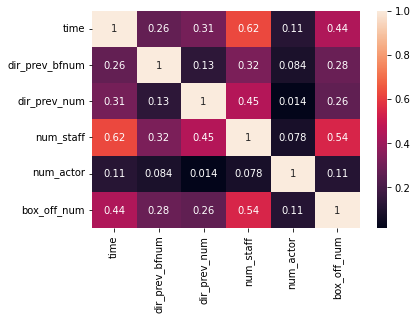

In [12]:
# heatmap 출력
sns.heatmap(train.corr(), annot=True)

> annot(셀에 표기된 데이터 값)과 우측 상관관계 막대를 살펴, attributes와 데이터의 상관도를 확인한다.

## 3. Data Cleansing & Pre-Processing  

### pd.Series.isna()
- 결측치 여부를 확인해줍니다.
- 결측치면 True, 아니면 False

In [13]:
train.isna()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
595,False,False,False,False,False,False,False,False,False,False,False,False
596,False,False,False,False,False,False,False,False,False,False,False,False
597,False,False,False,False,False,False,False,True,False,False,False,False
598,False,False,False,False,False,False,False,True,False,False,False,False


In [14]:
# 직관적인 확인 위해 T를 1, F를 0으로 변환하여 .sum() 함수로 모조리 합친다
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [15]:
# 행이 600개 이므로, 600으로 나누어 백분율을 확인한다.
train.isna().sum()/600

title            0.0
distributor      0.0
genre            0.0
release_time     0.0
time             0.0
screening_rat    0.0
director         0.0
dir_prev_bfnum   0.6
dir_prev_num     0.0
num_staff        0.0
num_actor        0.0
box_off_num      0.0
dtype: float64

In [16]:
# train 데이터프레임에서 결측값이 존재하는 [dir_prev_bfnum]행만 추출
train[train['dir_prev_bfnum'].isna()]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [17]:
# 해당 추출치에서 dir_prev_num 열만 추출
train[train['dir_prev_bfnum'].isna()]['dir_prev_num']

0      0
6      0
8      0
9      0
10     0
      ..
593    0
594    0
597    0
598    0
599    0
Name: dir_prev_num, Length: 330, dtype: int64

In [18]:
# 실제로 결측치인지 .sum() 함수로 더해봐서 확인
train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()

0

In [19]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


### pd.DataFrame.fillna()
- 결측치를 채우고자 하는 column과 결측치를 대신하여 넣고자 하는 값을 명시해주어야 합니다.
- 범주형 변수일 경우, 최빈값으로 대체할 수 있습니다. 

In [20]:
train['dir_prev_bfnum'].fillna(0, inplace = True)   # inplace = True이면 csv파일에 덮어쓰기
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.0,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.0,0,431,4,2192525


In [21]:
# 전처리 후(fillna로 결측치 메꾼 후) 진짜 바뀌었는지 확인
train.isna().sum()/600

title            0.0
distributor      0.0
genre            0.0
release_time     0.0
time             0.0
screening_rat    0.0
director         0.0
dir_prev_bfnum   0.0
dir_prev_num     0.0
num_staff        0.0
num_actor        0.0
box_off_num      0.0
dtype: float64

> 잘 처리된 모습이다

In [22]:
# testset도 변경
test['dir_prev_bfnum'].fillna(0, inplace = True)

## 4. Feature Engineering & Initial Modeling  

In [23]:
# lgb 패키지에서 LGBMRegressor 추출해서 사용
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)    # random seed를 777로 고정하겠다. 순차적으로 만드는 모델(에스티메이터)을 1000개 사용하겠다.

In [24]:
# 모델의 input(X)은 features, 아웃풋(Y)은 target에 저장
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor']
target = ['box_off_num']

In [25]:
# 모델에 인덱싱하여 대입
X_train, X_test, y_train = train[features], test[features], train[target]

## 5. Model Tuning & Evaluation

a. lightGBM (base model)\
b. k-fold lightGBM (k-fold model)\
c. feature engineering (fe)\
d. grid search (hyperparameter tuning)
> 후자로 갈 수록 고성능

### LightGBM Model

In [26]:
model.fit(X_train, y_train)

LGBMRegressor(n_estimators=1000, random_state=777)

In [27]:
singleLGBM = submission.copy()    # submission copy

In [31]:
singleLGBM.head()

,title,box_off_num
0,용서는 없다,2817995.2
1,아빠가 여자를 좋아해,375377.2
2,하모니,-569324.3
3,의형제,1581189.0
4,평행 이론,-527780.6


In [30]:
singleLGBM['box_off_num'] = model.predict(X_test)

In [32]:
singleLGBM.to_csv('singleLGBM.csv', index=False)

### k-fold cross validation model

In [34]:
# sklearn에서 kFold 임포트
from sklearn.model_selection import KFold

In [36]:
train

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
595,해무,(주)NEW,드라마,2014-08-13,111,청소년 관람불가,심성보,3833.0,1,510,7,1475091
596,파파로티,(주)쇼박스,드라마,2013-03-14,127,15세 관람가,윤종찬,496061.0,1,286,6,1716438
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,0.0,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,0.0,0,431,4,2192525


In [44]:
# k-fold 설정값 k_fold 변수에 저장
k_fold = KFold(n_splits=5, shuffle=True, random_state=777)

In [46]:
# 전체 dataset 중 trainset과 validationset의 개수를 출력
for train_idx, val_idx in k_fold.split(X_train) :
  print(len(train_idx), len(val_idx))
  break

480 120


In [50]:
# 모델 초기화
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

# 여러가지 모델을 저장할 models 리스트
models = []

# all dataset에서 trainset과 validationset 구분하기기
for train_idx, val_idx in k_fold.split(X_train) :
  x_t = X_train.iloc[train_idx]   # pandas에서 DataFrame의 인덱스로 접근해야 할 때 사용하는 함수 .iloc[i]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]

  models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))
  # early_stopping parameter로 과적합 방지 / verbose parameter는 몇 번째 학습마다 성능을 출력할지

[100]	valid_0's l2: 2.70572e+12
[100]	valid_0's l2: 3.90847e+12
[100]	valid_0's l2: 3.50344e+12
[100]	valid_0's l2: 1.45977e+12
[100]	valid_0's l2: 1.77214e+12


In [51]:
models

[LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777),
 LGBMRegressor(n_estimators=1000, random_state=777)]

In [52]:
# 예측값을 저장할 배열 preds 선언
preds = []
for model in models :
  preds.append(model.predict(X_test))
len(preds)

5

In [ ]:
preds

In [53]:
kfoldLightGBM = submission.copy()

In [55]:
# 평균값 구하기
import numpy as np

In [56]:
kfoldLightGBM['box_off_num'] = np.mean(preds, axis=0) #axis == 0이면 열, 1이면 행

In [57]:
kfoldLightGBM.head()

,title,box_off_num
0,용서는 없다,3367422.1
1,아빠가 여자를 좋아해,961138.9
2,하모니,1097929.7
3,의형제,2097270.8
4,평행 이론,781476.3


In [58]:
kfoldLightGBM.to_csv('kfoldLightGBM.csv', index=False)

## feature engineering

In [59]:
features

['time', 'dir_prev_num', 'num_staff', 'num_actor']

In [60]:
# 컬럼헤더 목록 확인인
train.columns

Index(['title', 'distributor', 'genre', 'release_time', 'time',
       'screening_rat', 'director', 'dir_prev_bfnum', 'dir_prev_num',
       'num_staff', 'num_actor', 'box_off_num'],
      dtype='object')

> genre 컬럼헤더를 사용한다

In [62]:
from sklearn import preprocessing

# LabelEncoder()를 이용해 카테고리형 데이터를 수치형 데이터로 변환
le = preprocessing.LabelEncoder()

# fit과 transform을 동시해 해주는 fit_transform() 함수
train['genre'] = le.fit_transform(train['genre'])

In [63]:
train['genre']

0      10
1       2
2      10
3      11
4      11
       ..
595     4
596     4
597     1
598     2
599    10
Name: genre, Length: 600, dtype: int64

In [75]:
test['genre']

0       2
1       5
2       4
3      10
4       1
       ..
238     4
239     3
240     2
241     4
242     5
Name: genre, Length: 243, dtype: int64

In [64]:
# testset에는 fit을 사용하지 않는다! 따라서 그냥 transform() 사용
test['genre'] = le.transform(test['genre'])

In [65]:
features = ['time', 'dir_prev_num', 'num_staff', 'num_actor', 'dir_prev_bfnum', 'genre']

In [66]:
X_train, X_test, y_train = train[features], test[features], train[target]

In [67]:
# 모델 초기화
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

# 여러가지 모델을 저장할 models 리스트
models = []

# all dataset에서 trainset과 validationset 구분하기기
for train_idx, val_idx in k_fold.split(X_train) :
  x_t = X_train.iloc[train_idx]   # pandas에서 DataFrame의 인덱스로 접근해야 할 때 사용하는 함수 .iloc[i]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]

  models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))
  # early_stopping parameter로 과적합 방지 / verbose parameter는 몇 번째 학습마다 성능을 출력할지

[100]	valid_0's l2: 2.62067e+12
[100]	valid_0's l2: 4.39227e+12
[100]	valid_0's l2: 3.29841e+12
[100]	valid_0's l2: 1.56499e+12
[100]	valid_0's l2: 1.60118e+12


/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


In [68]:
# 예측값을 저장할 배열 preds 선언
preds = []
for model in models :
  preds.append(model.predict(X_test))
len(preds)

5

In [70]:
X_test.head()

,time,dir_prev_num,num_staff,num_actor,dir_prev_bfnum,genre
0,125,2,304,3,300529.0,2
1,113,4,275,3,342700.2,5
2,115,3,419,7,4206610.7,4
3,116,2,408,2,691342.0,10
4,110,1,380,1,31738.0,1


In [71]:
feLightGBM = submission.copy()

In [74]:
# 평균 구하고 저장
feLightGBM['box_off_num'] = np.mean(preds, axis = 0)
feLightGBM.to_csv('feLightGBM.csv', index = False)

## Grid Search

In [76]:
from sklearn.model_selection import GridSearchCV

In [77]:
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000)

params = {
    'learning_rate': [0.1, 0.01, 0.003],    # 다음 학습모델에 대한 이전 모델의 반영도. 값이 작을수록 미세하게 반영영
    'min_child_samples': [20, 30]}

# learning_rate & min_child_samples; 두 개의 파라미터로 조합 6개

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  scoring='neg_mean_squared_error',
                  cv = k_fold)    #cross value

In [78]:
gs.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=777, shuffle=True),
             estimator=LGBMRegressor(n_estimators=1000, random_state=777),
             param_grid={'learning_rate': [0.1, 0.01, 0.003],
                         'min_child_samples': [20, 30]},
             scoring='neg_mean_squared_error')

In [79]:
# 최적의 조합 출력
gs.best_params_

{'learning_rate': 0.003, 'min_child_samples': 30}

> 이제 최적의 조합에 맞춰 모델을 초기화한다.

In [80]:
# 모델 초기화
model = lgb.LGBMRegressor(random_state=777, n_estimators=1000, learning_rate=0.003, min_child_samples=30)

# 여러가지 모델을 저장할 models 리스트
models = []

# all dataset에서 trainset과 validationset 구분하기기
for train_idx, val_idx in k_fold.split(X_train) :
  x_t = X_train.iloc[train_idx]   # pandas에서 DataFrame의 인덱스로 접근해야 할 때 사용하는 함수 .iloc[i]
  y_t = y_train.iloc[train_idx]
  x_val = X_train.iloc[val_idx]
  y_val = y_train.iloc[val_idx]

  models.append(model.fit(x_t, y_t, eval_set=(x_val, y_val), early_stopping_rounds=100, verbose = 100))
  # early_stopping parameter로 과적합 방지 / verbose parameter는 몇 번째 학습마다 성능을 출력할지

/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[100]	valid_0's l2: 2.56673e+12
[200]	valid_0's l2: 2.45583e+12
[300]	valid_0's l2: 2.42575e+12
[400]	valid_0's l2: 2.43392e+12
[100]	valid_0's l2: 4.89194e+12
[200]	valid_0's l2: 4.40922e+12
[300]	valid_0's l2: 4.19146e+12
[400]	valid_0's l2: 4.05951e+12
[500]	valid_0's l2: 3.96931e+12
[600]	valid_0's l2: 3.91727e+12
[700]	valid_0's l2: 3.88462e+12
[800]	valid_0's l2: 3.87695e+12
[900]	valid_0's l2: 3.87088e+12
[100]	valid_0's l2: 3.14361e+12
[200]	valid_0's l2: 2.79286e+12
[300]	valid_0's l2: 2.59302e+12
[400]	valid_0's l2: 2.47608e+12
[500]	valid_0's l2: 2.40386e+12
[600]	valid_0's l2: 2.36407e+12
[700]	valid_0's l2: 2.38505e+12
[100]	valid_0's l2: 1.60592e+12
[200]	valid_0's l2: 1.40227e+12
[300]	valid_0's l2: 1.30053e+12
[400]	valid_0's l2: 1.25184e+12
[500]	valid_0's l2: 1.23543e+12
[600]	valid_0's l2: 1.23595e+12
[100]	valid_0's l2: 1.96107e+12
[200]	valid_0's l2: 1.75478e+12
[300]	valid_0's l2: 1.64513e+12
[400]	valid_0's l2: 1.58132e+12
[500]	valid_0's l2: 1.54801e+12
[600]	va

In [81]:
# 예측값을 저장할 배열 preds 선언
preds = []
for model in models :
  preds.append(model.predict(X_test))
len(preds)

5

In [82]:
preds = []
for model in models:
  preds.append(model.predict(X_test))

In [84]:
gs.best_score_
gslgbm = submission.copy()
gslgbm['box_off_num'] = np.mean(preds, axis = 0)
gslgbm.to_csv('gslgbm.csv', index = False)